11/14/23

Pruning for SPD call dataset we plan to use for CSE 442 FP (Explorable Explanation). Our subject is police response times and what factors increase or decrease them, such as funding, neighborhood demographics, etc.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
filename = 'Call_Data_20231114.csv'
ogCallData = pd.read_csv(filename)

In [48]:
ogCallData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588861 entries, 0 to 5588860
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   CAD Event Number             int64  
 1   Event Clearance Description  object 
 2   Call Type                    object 
 3   Priority                     float64
 4   Initial Call Type            object 
 5   Final Call Type              object 
 6   Original Time Queued         object 
 7   Arrived Time                 object 
 8   Precinct                     object 
 9   Sector                       object 
 10  Beat                         object 
 11  Blurred_Longitude            float64
 12  Blurred_Latitude             float64
dtypes: float64(3), int64(1), object(9)
memory usage: 554.3+ MB


In [49]:
ogCallData.head(5)

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude
0,2018000254861,ASSISTANCE RENDERED,ONVIEW,9.0,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,07/11/2018 04:58:00 PM,07/11/2018 04:58:00 PM,WEST,DAVID,D2,-1.000000,-1.000000
1,2022000345693,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",4.0,PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),12/28/2022 07:54:06 AM,12/28/2022 08:46:42 AM,SOUTHWEST,WILLIAM,W3,-122.373896,47.536470
2,2020000161371,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",3.0,PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),05/16/2020 11:23:54 AM,NaN,SOUTH,ROBERT,R1,-122.313536,47.593111
3,2015000355310,ASSISTANCE RENDERED,ONVIEW,9.0,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,10/10/2015 10:08:53 PM,10/10/2015 10:08:53 PM,EAST,CHARLIE,C3,-1.000000,-1.000000
4,2019000036267,ASSISTANCE RENDERED,ONVIEW,9.0,OFF DUTY EMPLOYMENT,-OFF DUTY EMPLOYMENT,01/28/2019 08:19:50 AM,01/28/2019 08:19:50 AM,WEST,KING,K2,-1.000000,-1.000000


In [50]:
callData = ogCallData[(ogCallData["Call Type"] != "ONVIEW")] # these are "calls" that police started themselves
# so they're irrelevant to our question
callData = callData[(callData["Original Time Queued"] != callData["Arrived Time"])] # if time between queuing and arrival is 0
# it's either irrelevant or anonymous
callData.reset_index(drop=True, inplace=True)

In [51]:
callData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508617 entries, 0 to 3508616
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   CAD Event Number             int64  
 1   Event Clearance Description  object 
 2   Call Type                    object 
 3   Priority                     float64
 4   Initial Call Type            object 
 5   Final Call Type              object 
 6   Original Time Queued         object 
 7   Arrived Time                 object 
 8   Precinct                     object 
 9   Sector                       object 
 10  Beat                         object 
 11  Blurred_Longitude            float64
 12  Blurred_Latitude             float64
dtypes: float64(3), int64(1), object(9)
memory usage: 348.0+ MB


In [52]:
callData = callData.dropna(subset=["Arrived Time"]) # we need arrived time to calculate response time
callData.reset_index(drop=True, inplace=True)

In [53]:
callData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030226 entries, 0 to 3030225
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   CAD Event Number             int64  
 1   Event Clearance Description  object 
 2   Call Type                    object 
 3   Priority                     float64
 4   Initial Call Type            object 
 5   Final Call Type              object 
 6   Original Time Queued         object 
 7   Arrived Time                 object 
 8   Precinct                     object 
 9   Sector                       object 
 10  Beat                         object 
 11  Blurred_Longitude            float64
 12  Blurred_Latitude             float64
dtypes: float64(3), int64(1), object(9)
memory usage: 300.5+ MB


In [54]:
print(callData[(callData["Blurred_Longitude"] != -1)].shape[0])
print(callData[(callData["Blurred_Latitude"] != -1)].shape[0])

2910798
2910798


The majority of the dataset has non-obscurred longitude and latitude. In this project's infancy, we considered using this coordinate data, so we left it in.

In [55]:
callData["Original Time Queued"] = pd.to_datetime(callData["Original Time Queued"], format='%m/%d/%Y %I:%M:%S %p') 
callData["Arrived Time"] = pd.to_datetime(callData["Arrived Time"], format='%m/%d/%Y %I:%M:%S %p') # convert to date time
callData["Response Time"] = callData["Arrived Time"] - callData["Original Time Queued"]
callData["Response Time"] = (callData["Response Time"].dt.total_seconds() / 60) # get response time in minutes

In [56]:
callData.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude,Response Time
0,2022000345693,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",4.0,PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),2022-12-28 07:54:06,2022-12-28 08:46:42,SOUTHWEST,WILLIAM,W3,-122.373896,47.536470,52.600000
1,2016000265625,REPORT WRITTEN (NO ARREST),911,2.0,THREATS - DV - NO ASSAULT,--DISTURBANCE - OTHER,2016-07-24 21:14:25,2016-07-24 21:23:03,NORTH,LINCOLN,L1,-122.293701,47.729170,8.633333
2,2015000261442,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3.0,"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",--ALARM-RESIDENTIAL BURG,2015-07-29 23:56:29,2015-07-30 01:08:23,WEST,DAVID,D3,-122.324663,47.640878,71.900000
3,2019000357580,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2.0,THREATS - DV - NO ASSAULT,"--ASSAULTS - HARASSMENT, THREATS",2019-09-24 18:01:17,2019-09-24 20:18:56,WEST,DAVID,D3,-122.338465,47.620874,137.650000
4,2017000295505,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3.0,"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","--ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN)",2017-08-10 18:19:20,2017-08-10 23:48:25,WEST,DAVID,D1,-122.344563,47.612222,329.083333


In [57]:
callData = callData.drop("CAD Event Number", axis=1) # get rid of unnecessary columns
callData = callData.drop("Event Clearance Description", axis=1)
callData = callData.drop("Sector", axis=1)
callData = callData.drop("Final Call Type", axis=1)

We wanted some way to compare the response times of different regions in Seattle to each other. We could then look at traits of these regions and look for trends, e.g. to look for police bias, analyze racial and socioeconomic demographics. I did this by converting every Seattle beat into neighborhoods by looking at this map: https://www.seattle.gov/police/information-and-data/data/tweets-by-beat

In [58]:
callData["Neighborhood"] = callData["Beat"].map({'N1': "Bitter Lake", 'N2': "Northgate", 'N3': "Northgate", 'L1': "Lake City", 'L2': "Northgate", 'L3': "Sand Point", 
                                                 'J1': "Ballard North", 'J2': "Ballard North", 'J3': "Roosevelt/Ravenna", 'U1': "Roosevelt/Ravenna", 'U2': "University", 
                                                 'U3': "Sand Point", 'B1': "Ballard South", 'B2': "Fremont", 'B3': "Wallingford", 'Q1': "Magnolia", 'Q2': "Queen Anne", 
                                                 'Q3' : "Queen Anne", 'D1': "BellTown", 'D2': 'Queen Anne', 'D3': "SLU/Cascade", 'C1': 'Capitol Hill', 
                                                 'C2': 'Montlake/Portage Bay', 'C3': "Madrona/Leschi", 'M1': "Downtown Commercial", "M2": "Downtown Commercial", 
                                                 "M3": "Downtown Commercial", 'E1': "Capitol Hill", 'E2': "Capitol Hill", 'E3': "First Hill", 'K1': "Downtown Commercial",
                                                 'K2': "Pioneer Square", 'K3': "Chinatown", 'G1': "First Hill", 'G2': "Central Area/Squire Park", 'G3': "Madrona/Leschi", 
                                                 'W1': "North Admiral", 'W2': "Alaska Junction", 'W3': "Fauntleroy SW", 'F1': 'North Delridge', 'F2': 'Roxhill/Westwood/Arbor Heights',
                                                 'F3': "Highland Park", 'O1': "Sodo", 'O2': "Georgetown", 'O3': 'Georgetown', 'R1': "North Beacon Hill", 'R2': "Mount Baker", 
                                                 'R3': "Lakewood/Seward Park", 'S1': "South Beacon Hill", 'S2': "Brighton/Dunlap", 'S3': "Rainier View"})

In [59]:
callData = callData[(callData["Original Time Queued"].dt.year != 2023)] # 2023 wasn't over at the time
# so comparing it to other years would be unfair
callData.reset_index(drop=True, inplace=True)
callData["Og_Date"] = callData["Original Time Queued"].dt.date
callData["Og_Year"] = callData["Original Time Queued"].dt.year
callData["Og_Time"] = callData["Original Time Queued"].dt.time
callData = callData.drop("Original Time Queued", axis=1)
callData = callData.drop("Arrived Time", axis=1)

In [60]:
callData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843445 entries, 0 to 2843444
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Call Type          object 
 1   Priority           float64
 2   Initial Call Type  object 
 3   Precinct           object 
 4   Beat               object 
 5   Blurred_Longitude  float64
 6   Blurred_Latitude   float64
 7   Response Time      float64
 8   Neighborhood       object 
 9   Og_Date            object 
 10  Og_Year            int64  
 11  Og_Time            object 
dtypes: float64(4), int64(1), object(7)
memory usage: 260.3+ MB


In [61]:
callData.head()

,Call Type,Priority,Initial Call Type,Precinct,Beat,Blurred_Longitude,Blurred_Latitude,Response Time,Neighborhood,Og_Date,Og_Year,Og_Time
0,"TELEPHONE OTHER, NOT 911",4.0,PARKING VIOLATION (EXCEPT ABANDONED CAR),SOUTHWEST,W3,-122.373896,47.536470,52.600000,Fauntleroy SW,2022-12-28,2022,07:54:06
1,911,2.0,THREATS - DV - NO ASSAULT,NORTH,L1,-122.293701,47.729170,8.633333,Lake City,2016-07-24,2016,21:14:25
2,ALARM CALL (NOT POLICE ALARM),3.0,"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",WEST,D3,-122.324663,47.640878,71.900000,SLU/Cascade,2015-07-29,2015,23:56:29
3,"TELEPHONE OTHER, NOT 911",2.0,THREATS - DV - NO ASSAULT,WEST,D3,-122.338465,47.620874,137.650000,SLU/Cascade,2019-09-24,2019,18:01:17
4,ALARM CALL (NOT POLICE ALARM),3.0,"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)",WEST,D1,-122.344563,47.612222,329.083333,BellTown,2017-08-10,2017,18:19:20


In [62]:
#callData.to_csv('call_data_pruned_2.csv', index=False)
# used this for additional analysis and sub-dataset making in sql

3.0    1042051
2.0     986121
1.0     549226
5.0     139828
4.0      79080
6.0      44537
9.0       1768
7.0        831
8.0          3
Name: Priority, dtype: int64


<AxesSubplot:title={'center':'Number of Calls Per Priority'}, xlabel='Priority', ylabel='Number of Calls'>

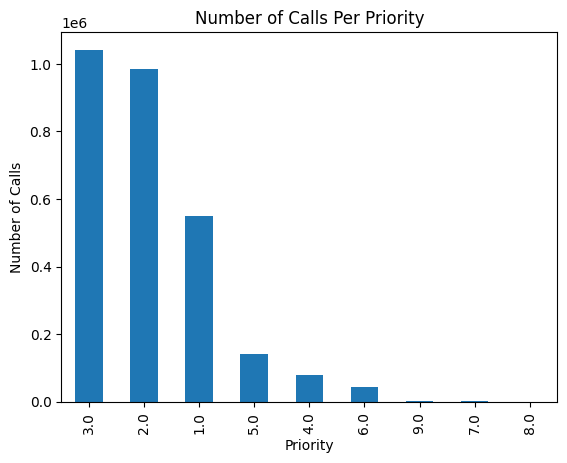

In [63]:
# a little bit of EDA
print(callData['Priority'].value_counts(sort=True))
callData['Priority'].value_counts(sort=True).plot.bar(xlabel="Priority", ylabel="Number of Calls", title="Number of Calls Per Priority")